In [1]:
import numpy as np 
from scipy.integrate import odeint
import os, sys 
from pathlib import Path
from os.path import dirname, realpath
script_dir = Path(dirname(realpath('.')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
import utility as ut
import surrogate as sr
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
save_folder = '../data/L63-SMLR-1'
L63_data_folder = '../data/L63-trajectories'
bsa = sr.BatchRunAnalyzer_SMLR(save_folder)
u = np.load('{}/train.npy'.format(L63_data_folder)) 
model = bsa.get_model(0, 1, 10)
col_sums = np.sum(np.abs(model.W), axis=0)

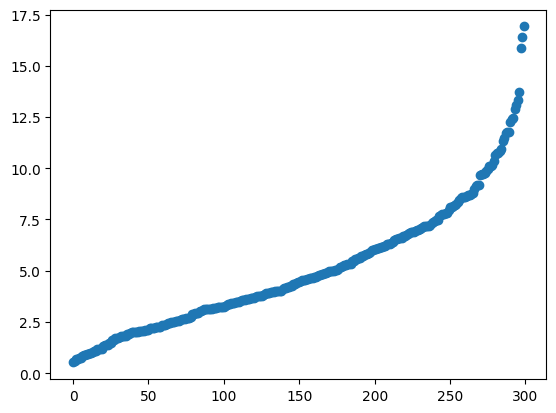

In [8]:
plt.scatter(range(300), np.sort(col_sums))

In [24]:
data = [] 
for x in u.T:
    data += [(np.abs(model.W) ]

(array([ 5167., 22419., 37989., 35665., 25471., 21800., 23906., 19417.,
         7323.,   843.]),
 array([333.71694987, 371.33910224, 408.96125462, 446.58340699,
        484.20555936, 521.82771174, 559.44986411, 597.07201649,
        634.69416886, 672.31632124, 709.93847361]),
 <BarContainer object of 10 artists>)

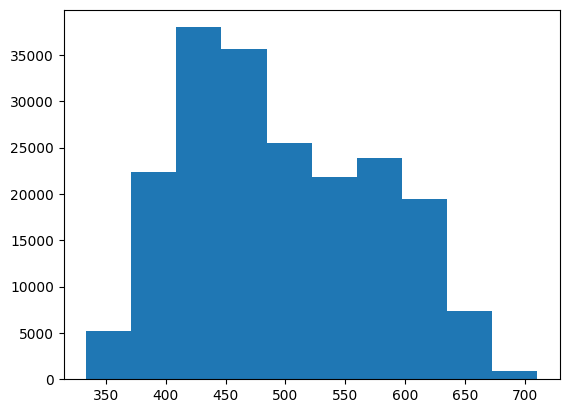

In [25]:
plt.hist(data)

In [19]:
model.W.shape

(3, 300)

In [27]:
data = [np.dot(np.abs(e), model.phi(u[:, 0])) for e in model.W.T]
plt.hist(data)

ValueError: shapes (3,) and (300,) not aligned: 3 (dim 0) != 300 (dim 0)

In [33]:
phi = model.phi(u[:, 0])
for e in model.W.T:
    print(np.dot(np.abs(e), np.abs(phi)))

ValueError: shapes (3,) and (300,) not aligned: 3 (dim 0) != 300 (dim 0)

In [10]:
data = []
for i in range(20000):
    phi = model.phi(u[:, i])
    data .append(np.sort(np.sum(np.abs(model.W * phi), axis=0)))
data = np.array(data)
data = np.sort(data.flatten()).reshape(data.shape)
print(data.shape)

(20000, 300)


(array([162.,  48.,  34.,  21.,  15.,   8.,   3.,   6.,   1.,   2.]),
 array([6.05272723e-03, 8.88689711e-01, 1.77132669e+00, 2.65396368e+00,
        3.53660066e+00, 4.41923765e+00, 5.30187463e+00, 6.18451161e+00,
        7.06714860e+00, 7.94978558e+00, 8.83242257e+00]),
 <BarContainer object of 10 artists>)

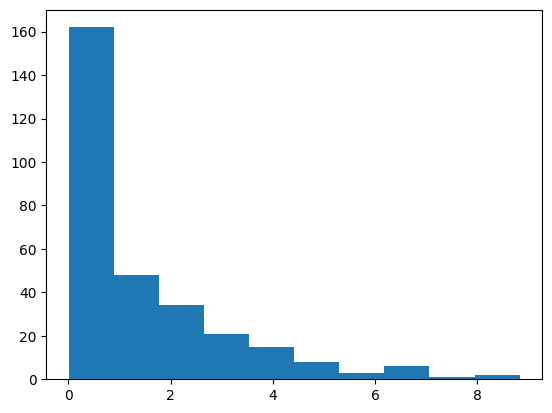

In [44]:
plt.hist(data)

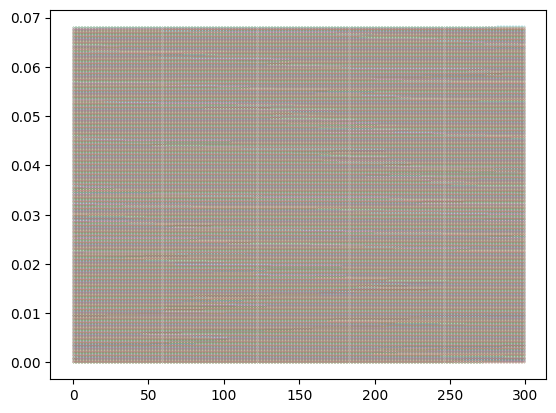

In [12]:
for i in range(1000):
    plt.scatter(range(300), data[i, :], s=.01)
# plt.ylim(0., 2.)

In [48]:
u.shape

(3, 200000)